
--- Definiere Modell 3 (Angepasste Architektur) ---
Model: "Model_3_Adapted_Arch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                           

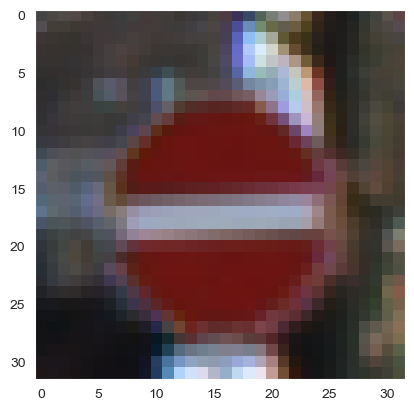

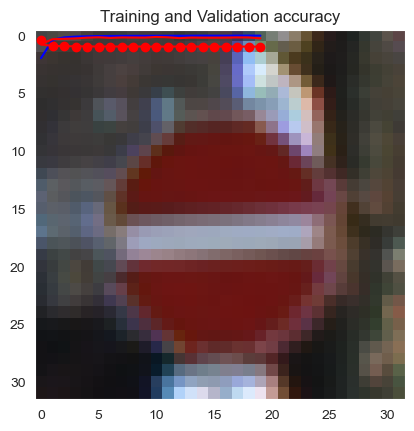

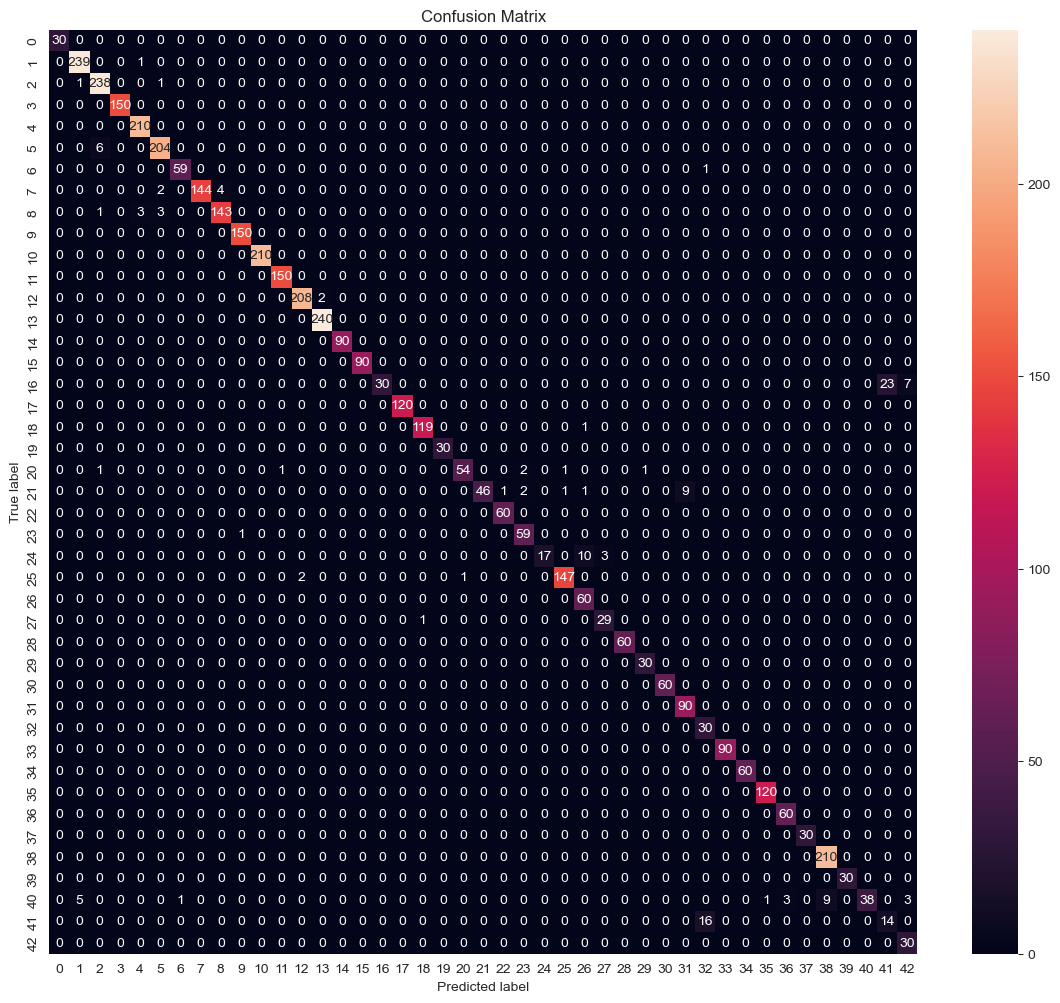

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

from tensorflow.keras import layers, models

model = models.Sequential()

# %% Modell 3 definieren 
print("\n--- Definiere Modell 3 (Angepasste Architektur) ---")
model_3 = models.Sequential(name="Model_3_Adapted_Arch")

# Hier wurde die Filteranzahl geändert (z.B. 64, 128, 256)
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Noch mehr Filter hier
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu')) # Auch die Dense-Schicht wurde vergrößert
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(43, activation='softmax')) # 43 Klassen für Verkehrszeichen


# Prints a summary of your network
model_3.summary()

# %% Modell 3 kompilieren
print("\n--- Kompiliere Modell 3 ---")
model_3.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# %% Modell 3 trainieren
history = model_3.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 20, 
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

# %% Trainingsergebnisse visualisieren
history.history.keys()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

# Speichern
model_3.save('saved_model/traffic_sign_model_3.h5')

#Matrix
from sklearn.metrics import confusion_matrix

y_pred_probs = model_3.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()